<a href="https://colab.research.google.com/github/ashok2216-A/Data_Analytics/blob/main/intel_stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader as web
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(18,8))
plt.rc('lines', markersize=4)
plt.rc('font', size=18)
!rm -rf ./logs/
%load_ext tensorboard
from sklearn.datasets import fetch_openml
import tensorflow as tf
from tensorflow import keras

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


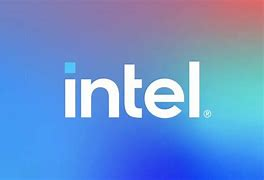

In [ ]:
intel = web.DataReader('INTC', data_source='yahoo', start='2012-01-01', end='2019-12-31')
intel

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,18.532988
2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,18.963461
2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.182468
2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.069187
2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.235336
...,...,...,...,...,...,...
2019-12-24,59.480000,59.160000,59.250000,59.410000,6313200.0,57.266144
2019-12-26,59.849998,59.349998,59.410000,59.820000,11480300.0,57.661350
2019-12-27,60.480000,59.900002,59.910000,60.080002,14085800.0,57.911968


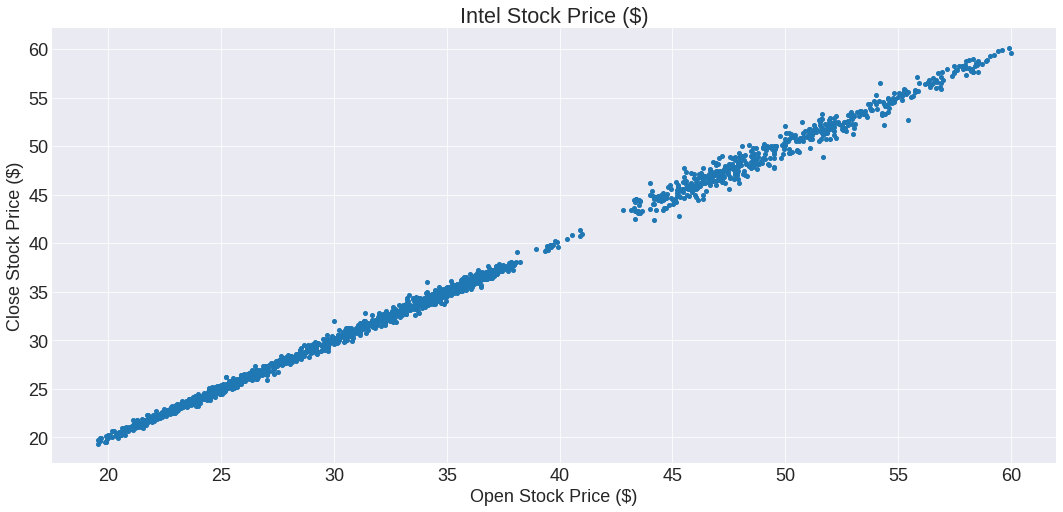

In [ ]:
plt.title('Intel Stock Price ($)')
plt.xlabel('Open Stock Price ($)')
plt.ylabel('Close Stock Price ($)')
plt.scatter(intel['Open'],intel['Close'])
plt.show()

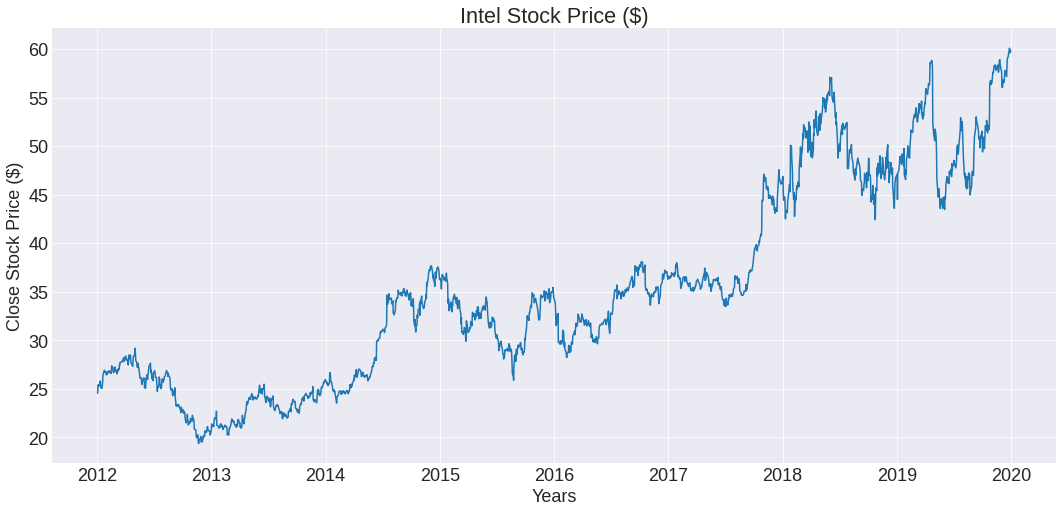

In [ ]:
plt.title('Intel Stock Price ($)')
plt.xlabel('Years')
plt.ylabel('Close Stock Price ($)')
plt.plot(intel['Close'])
plt.show()

In [ ]:
intel = intel[['Close']]
intel.head()

,Close
Date,
2012-01-03,24.540001
2012-01-04,25.110001
2012-01-05,25.400000
2012-01-06,25.250000
2012-01-09,25.469999


In [ ]:
futuredays = 50

In [ ]:
intel['prediction'] = intel[['Close']].shift(-futuredays)
intel

,Close,prediction
Date,,
2012-01-03,24.540001,27.750000
2012-01-04,25.110001,27.730000
2012-01-05,25.400000,27.740000
2012-01-06,25.250000,27.750000
2012-01-09,25.469999,27.780001
...,...,...
2019-12-24,59.410000,NaN
2019-12-26,59.820000,NaN
2019-12-27,60.080002,NaN


In [ ]:
x = np.array(intel.drop(['prediction'], 1))[:-futuredays]
x

array([[24.54000092],
       [25.11000061],
       [25.39999962],
       ...,
       [52.45000076],
       [51.86000061],
       [51.36000061]])

In [ ]:
y =np.array(intel['prediction'])[:-futuredays]
y

array([27.75      , 27.72999954, 27.73999977, ..., 60.08000183,
       59.61999893, 59.84999847])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
linear = LinearRegression().fit(x_train, y_train)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
x_future = intel.drop(['prediction'], 1)[:-futuredays]
x_future = x_future.tail(futuredays)
x_future = np.array(x_future)
x_future

array([[45.97999954],
       [45.59999847],
       [46.84000015],
       [45.86999893],
       [45.70000076],
       [46.5       ],
       [47.22999954],
       [46.59999847],
       [47.15000153],
       [46.77999878],
       [44.95999908],
       [45.56000137],
       [45.79000092],
       [45.79000092],
       [46.86999893],
       [47.40999985],
       [46.97999954],
       [48.91999817],
       [50.09999847],
       [50.91999817],
       [51.59000015],
       [51.81999969],
       [52.79000092],
       [53.00999832],
       [52.54000092],
       [52.20000076],
       [51.95000076],
       [51.74000168],
       [51.56999969],
       [50.72000122],
       [50.90000153],
       [49.81999969],
       [51.02000046],
       [50.91999817],
       [50.77999878],
       [51.52999878],
       [50.75999832],
       [49.38999939],
       [50.02999878],
       [50.91999817],
       [50.61999893],
       [49.72999954],
       [50.47999954],
       [51.11000061],
       [52.09000015],
       [51

In [ ]:
linear_prediction = linear.predict(x_future)

In [ ]:
tree_prediction = tree.predict(x_future)

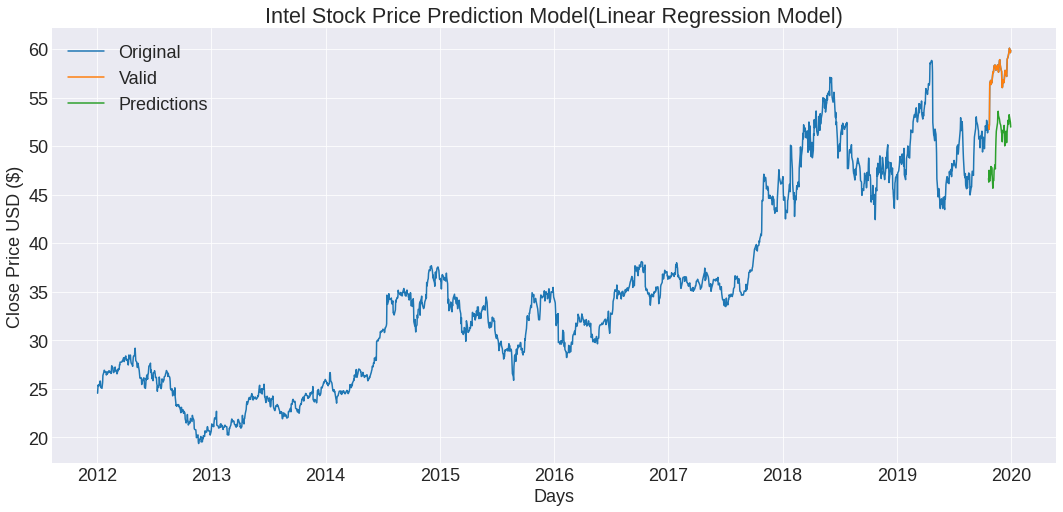

In [ ]:
predictions = linear_prediction
valid = intel[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(intel["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

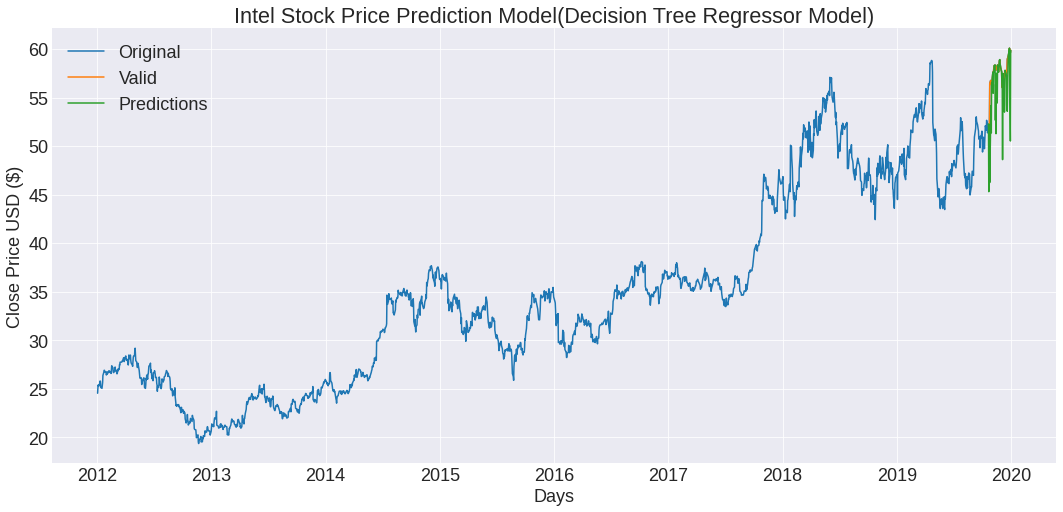

In [ ]:
predictions = tree_prediction
valid = intel[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(intel["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

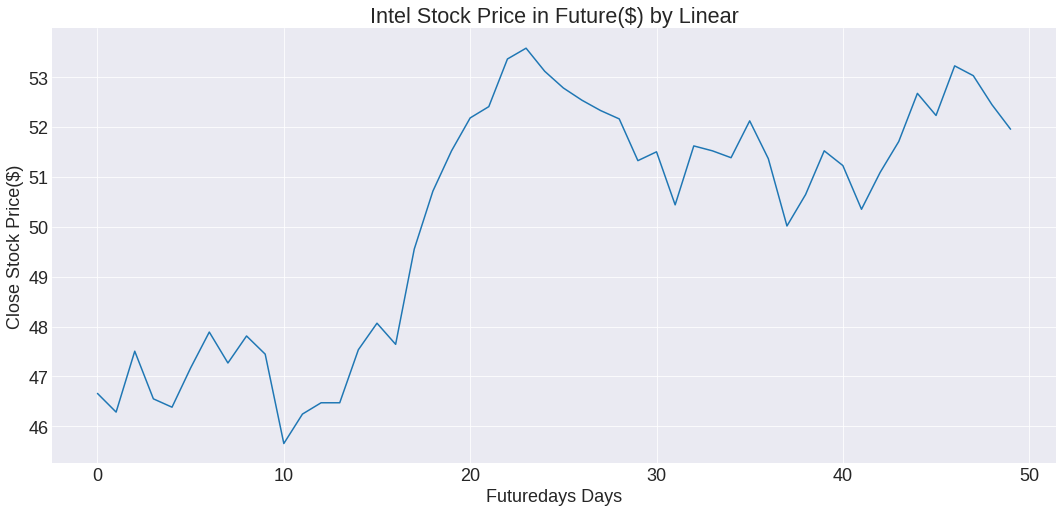

In [ ]:
plt.title('Intel Stock Price in Future($) by Linear')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(linear_prediction)

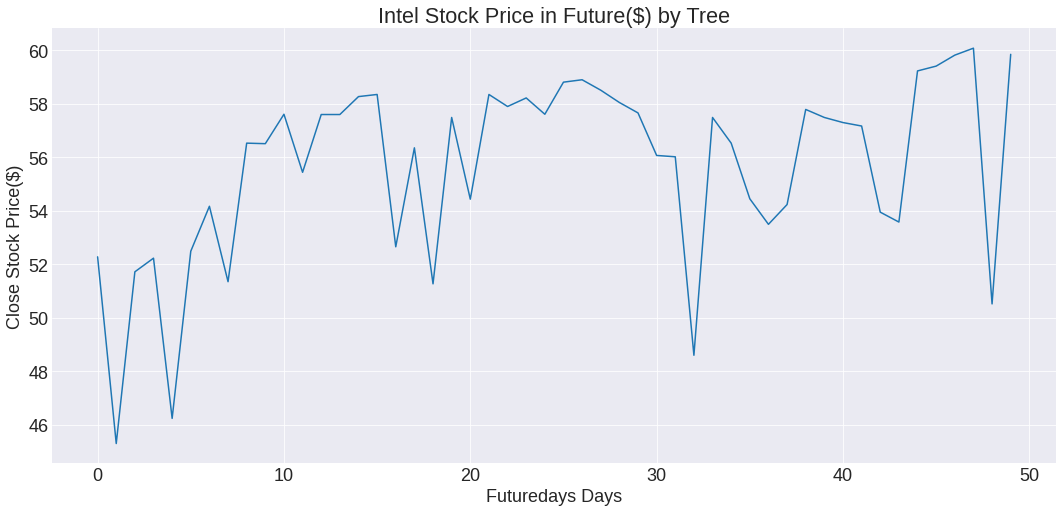

In [ ]:
plt.title('Intel Stock Price in Future($) by Tree')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(tree_prediction)

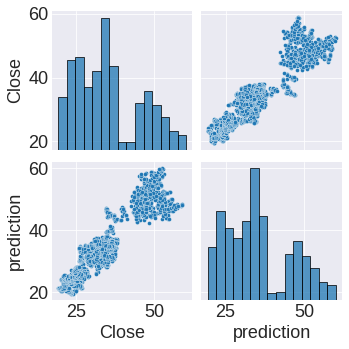

In [ ]:
sns.pairplot(intel)

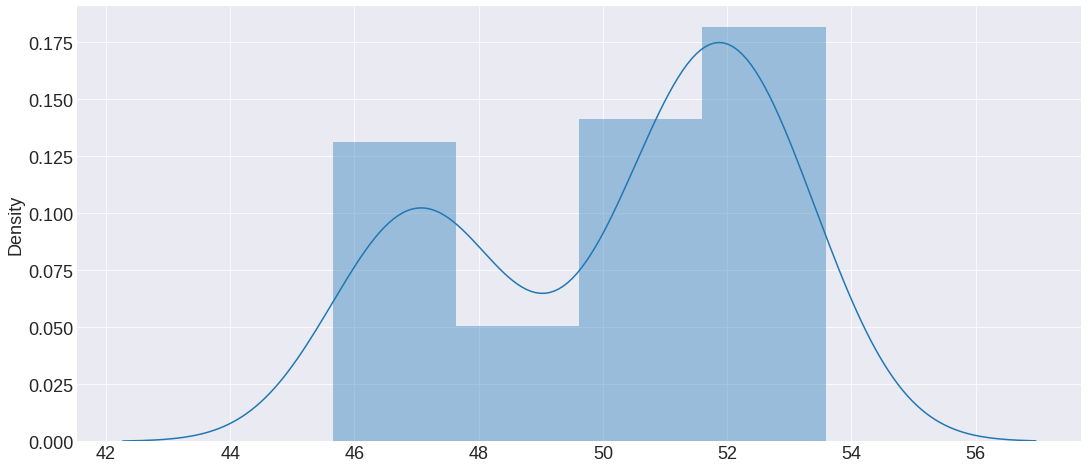

In [ ]:
sns.distplot(linear_prediction)

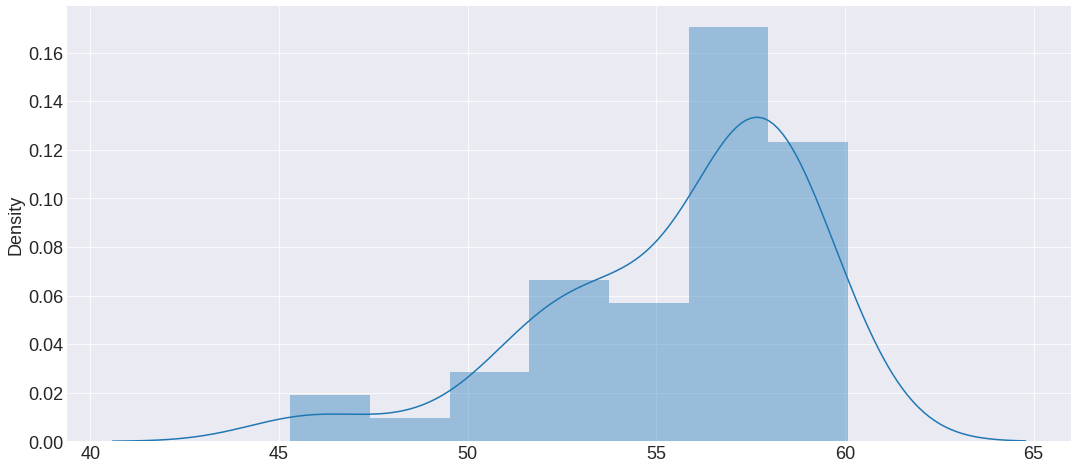

In [ ]:
sns.distplot(tree_prediction)

In [ ]:
intel.corr()

,Close,prediction
Close,1.000000,0.929655
prediction,0.929655,1.000000


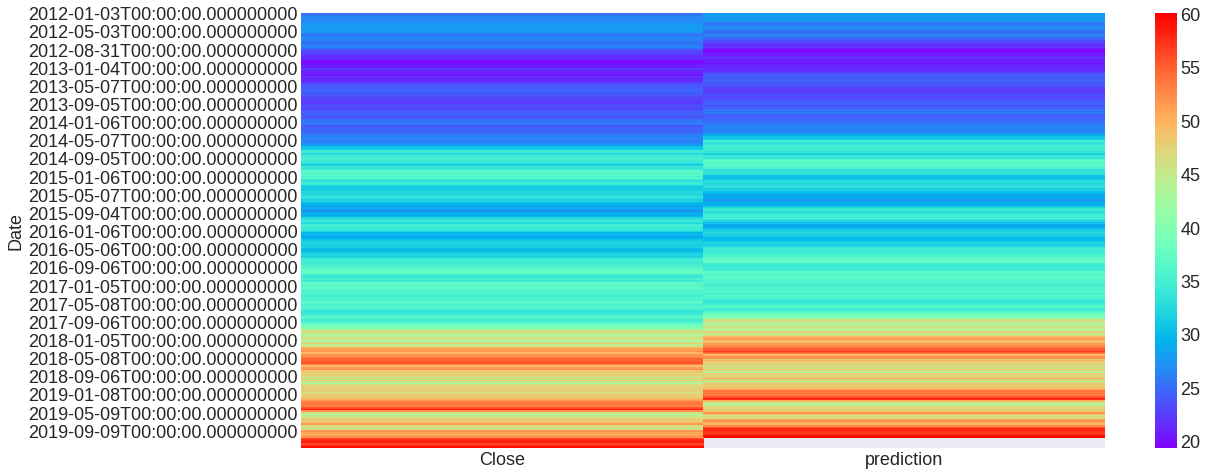

In [ ]:
sns.heatmap(intel,cmap='rainbow')

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
print('coefficient: \n', regr.coef_)

coefficient: 
 [0.98473215]


In [ ]:
print('Mean squared Erroe: %2f' % mean_squared_error(y_test, y_pred))

Mean squared Erroe: 15.991751


In [ ]:
print('Coefficient of determination: %.2f' % r2_score(x_test, y_pred))

Coefficient of determination: 0.99


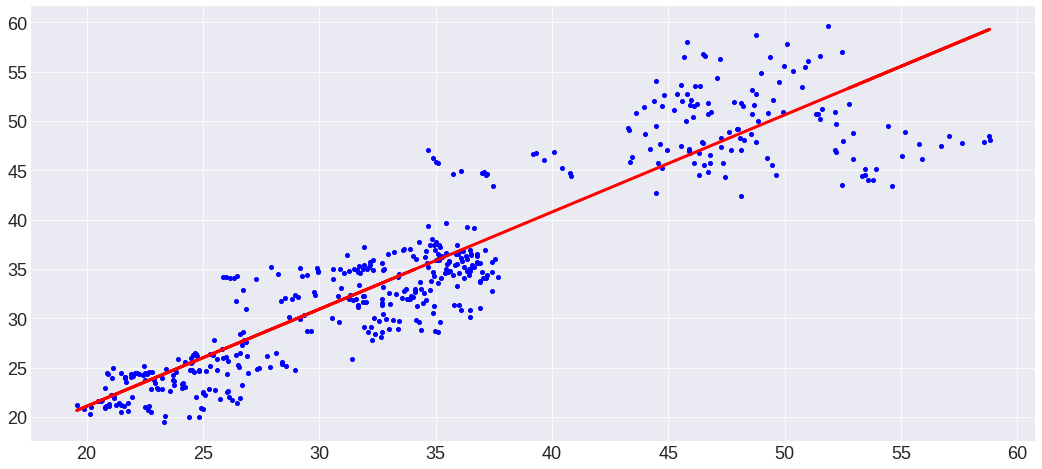

In [ ]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=3)

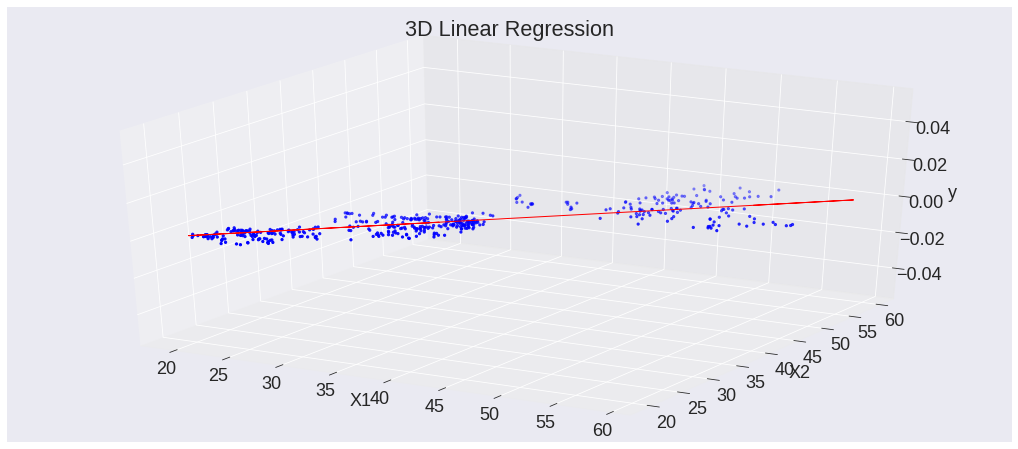

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test, y_test, marker='.', color='blue')
ax.set_title("3D Linear Regression")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.plot(x_test, y_pred, color='red', linewidth=1)